In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('wine-clustering.csv')
dados.columns = [x.lower() for x in dados.columns]
dados

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Clusterização

A clusterização exige sempre muita vizualização de dados. Entretanto, quando temos um agrupamento a ser feito considerando mais de 3 variáveis a clusterização se torna muito complexa de ser observada. É sempre possível utilizar artifícios visuais como bubble plots que permitem apresentar 3, 4 as vezes até 5 variáveis na mesma visualização. 

Entretanto, sempre é necessário ter mente o publico que irá absorver os dados da clusterizaçao. Se for o público acadêmico, normalmente visualizações mais complexas - 3D, por exemplo - são bem recebidas; se o público for de outras áreas, em geral gráficos mais complexos não são tão bem recebidos.

Por outro lado, é sempre possível fazer análises numéricas e estatísticas dos grupos gerados para a validação dos clusters.

Vejamos na prática

## KMeans

O k-means é um algoritmo de clusterização amplamente utilizado que tem como objetivo particionar um conjunto de pontos de dados em "k" grupos, onde "k" é um número especificado pelo usuário. O algoritmo funciona iterativamente para atribuir cada ponto de dados ao cluster que tem o centroide mais próximo. Os passos básicos do algoritmo são:

* Escolha inicialmente "k" pontos de dados aleatórios como centroides dos clusters.
* Atribua cada ponto de dados ao cluster cujo centroide é o mais próximo.
* Calcule o centroide (média) de cada cluster com base nos pontos de dados que foram atribuídos a ele.
* Repita os passos 2 e 3 até que os centroides não mudem significativamente ou até que um número máximo de iterações seja atingido.

O resultado do k-means pode variar com diferentes inicializações de centroides. Por isso, muitas vezes é comum rodar o algoritmo várias vezes com diferentes inicializações e escolher a solução com a menor soma dos quadrados das distâncias entre os pontos de dados e seus centroides de cluster correspondentes.

O k-means é simples e eficaz para conjuntos de dados grandes, mas sua eficácia pode diminuir quando os clusters têm formas não esféricas ou tamanhos muito diferentes.

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
kmeans = KMeans(n_clusters = 3, random_state = 2,init = 'k-means++')
x = scaler.fit_transform(dados.iloc[:,:].values)
kmeans.fit(x)
dados['cluster'] = kmeans.labels_
dados

d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 5\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


### Análise gráfica

<Axes: xlabel='ash', ylabel='magnesium'>

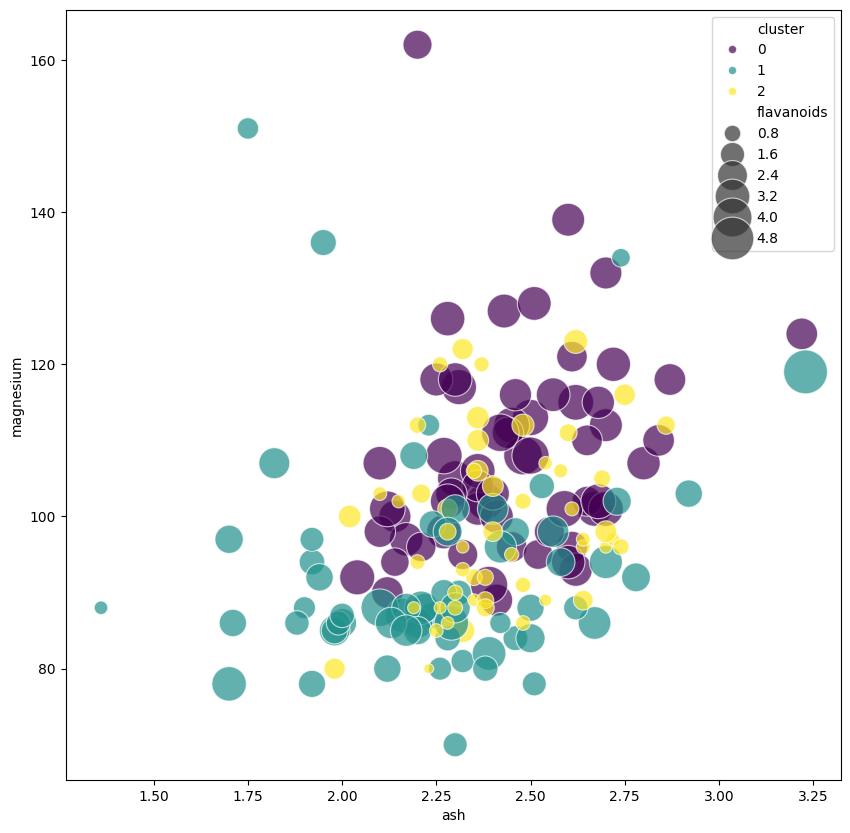

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data=dados, x='ash', y='magnesium', size='flavanoids', hue='cluster', palette='viridis', sizes=(50,1000), alpha=0.7)

In [6]:
import plotly.express as px
fig = px.scatter_3d(dados, 
                    x='alcohol', 
                    y='malic_acid', 
                    z='ash', 
                    color='cluster', 
                    size='proline', 
                    size_max=100,
                    color_continuous_scale='viridis')
fig.write_html("bubble_plot_3d.html")
# fig.show()

### Análise numérica e estatística

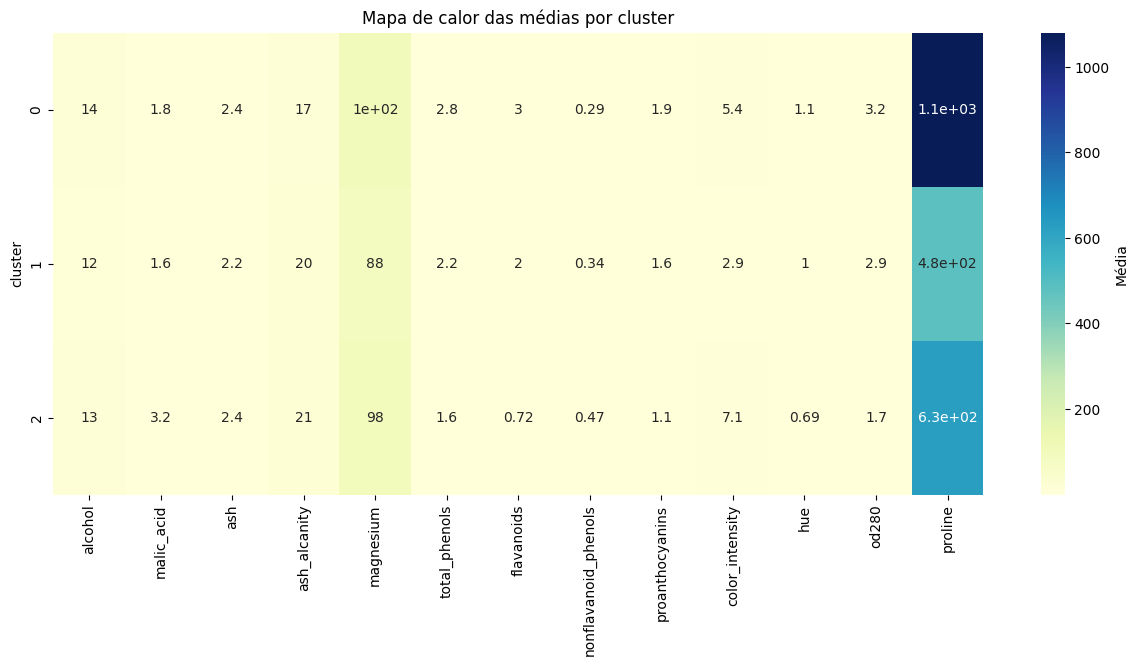

In [7]:
cluster_means = dados.groupby('cluster').median()
plt.figure(figsize=(15, 6))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Média'})
plt.title('Mapa de calor das médias por cluster')
plt.show()

Para fins de facilitar a visualização podemos manter a anotação dos dados, mas basear as cores nos valores normalizados

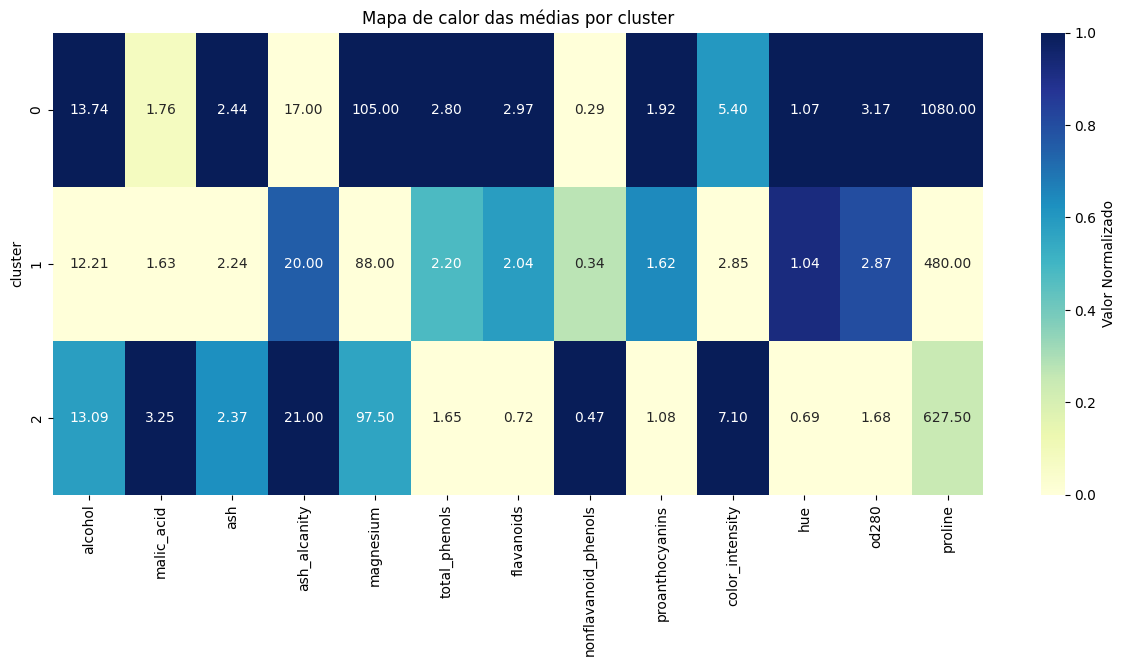

In [8]:
normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())
plt.figure(figsize=(15, 6))
sns.heatmap(normalized, annot=cluster_means, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Valor Normalizado'})
plt.title('Mapa de calor das médias por cluster')
plt.show()

### Elbow Method

O "Elbow Method" (Método do Cotovelo) é uma técnica heurística usada na determinação do número de clusters em um conjunto de dados. O método envolve a execução da clusterização k-means no conjunto de dados para um intervalo de valores de k (por exemplo, k de 1 a 10) e, em seguida, para cada valor de k, calcular a soma dos quadrados das distâncias entre os pontos de dados e o centróide de seu cluster (chamada de soma dos quadrados intra-cluster, WCSS).

Aqui está uma explicação passo a passo do método:

* Compute k-means clustering: Para cada valor de k, execute a clusterização k-means e calcule a soma dos quadrados intra-cluster (WCSS).
* Plote a curva: Plote os valores de WCSS para os diferentes valores de k no mesmo gráfico. 
* Encontre o "cotovelo": À medida que o número de clusters k aumenta, o WCSS tende a diminuir (pois os pontos estarão mais próximos de seus respectivos centróides). No entanto, o ganho na redução do WCSS começa a atenuar à medida que k aumenta. O valor de k em que essa atenuação se torna notável (ou seja, a taxa de redução começa a se estabilizar e/ou diminuir) é chamado de ponto "cotovelo".
* Decisão: O número ótimo de clusters é geralmente escolhido no "cotovelo", ou seja, o ponto após o qual a redução do WCSS começa a ser mínima.

É importante ressaltar que o método do cotovelo não fornece uma resposta clara e objetiva para o número ideal de clusters, mas oferece uma maneira visual de estimar um número razoável de clusters com base na variação explicada. Além disso, em muitos conjuntos de dados, pode não haver um cotovelo claramente visível, tornando a decisão mais subjetiva. Em tais casos, outras técnicas ou conhecimento de domínio podem ser necessários para determinar o número apropriado de clusters.

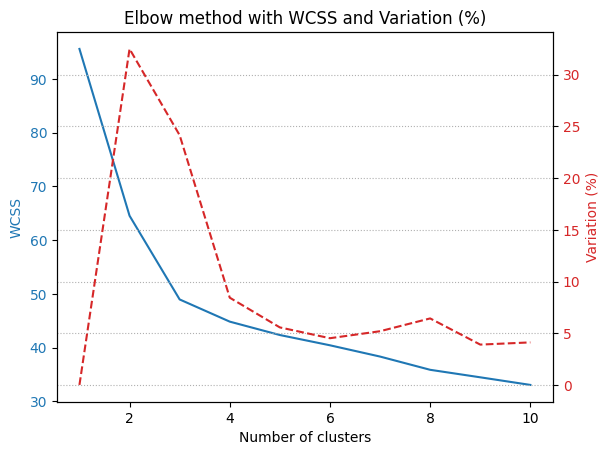

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
wcss = []
# davies_bouldin_score = metrics.davies_bouldin_score(X, kmeans_model.labels_)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
variations = [0]
for i in range(1, len(wcss)):
    variations.append((wcss[i-1] - wcss[i]) / wcss[i-1] * 100)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(range(1, 11), wcss, color='tab:blue', label='WCSS')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # Segundo eixo y para as variações percentuais
ax2.set_ylabel('Variation (%)', color='tab:red')
ax2.plot(range(1, 11), variations, color='tab:red', label='Variation (%)', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Elbow method with WCSS and Variation (%)')
plt.grid(ls=':')
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 3, random_state = 2,init = 'k-means++')
kmeans.fit(x)
dados['cluster'] = kmeans.labels_


d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 5\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<Axes: xlabel='alcohol', ylabel='malic_acid'>

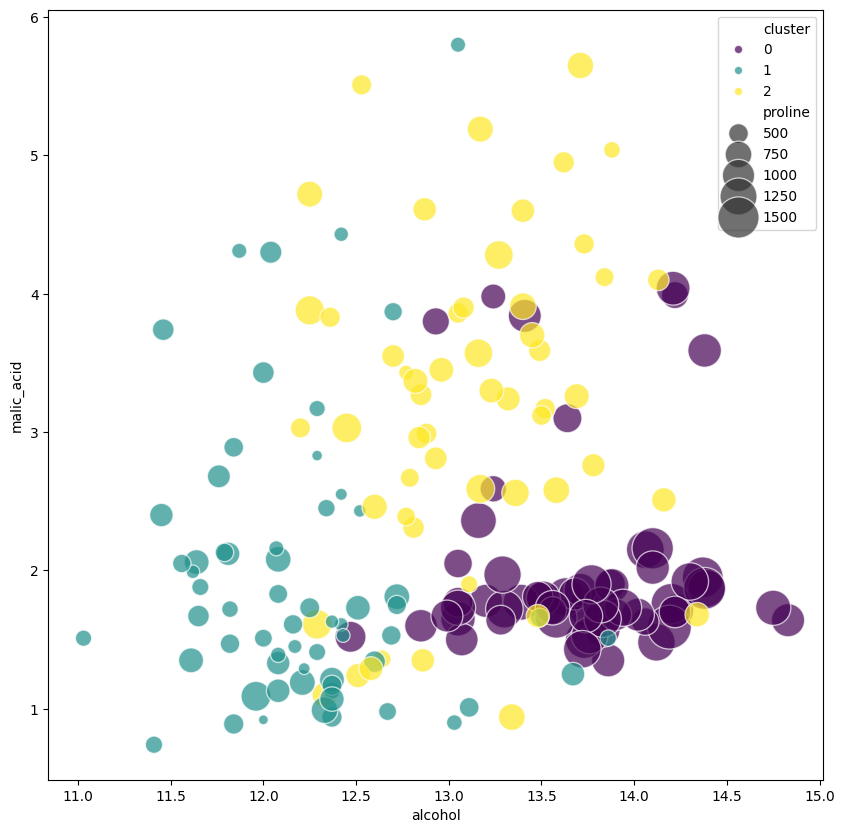

In [11]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dados, x='alcohol', y='malic_acid', size='proline', hue='cluster', palette='viridis', sizes=(50,1000), alpha=0.7)

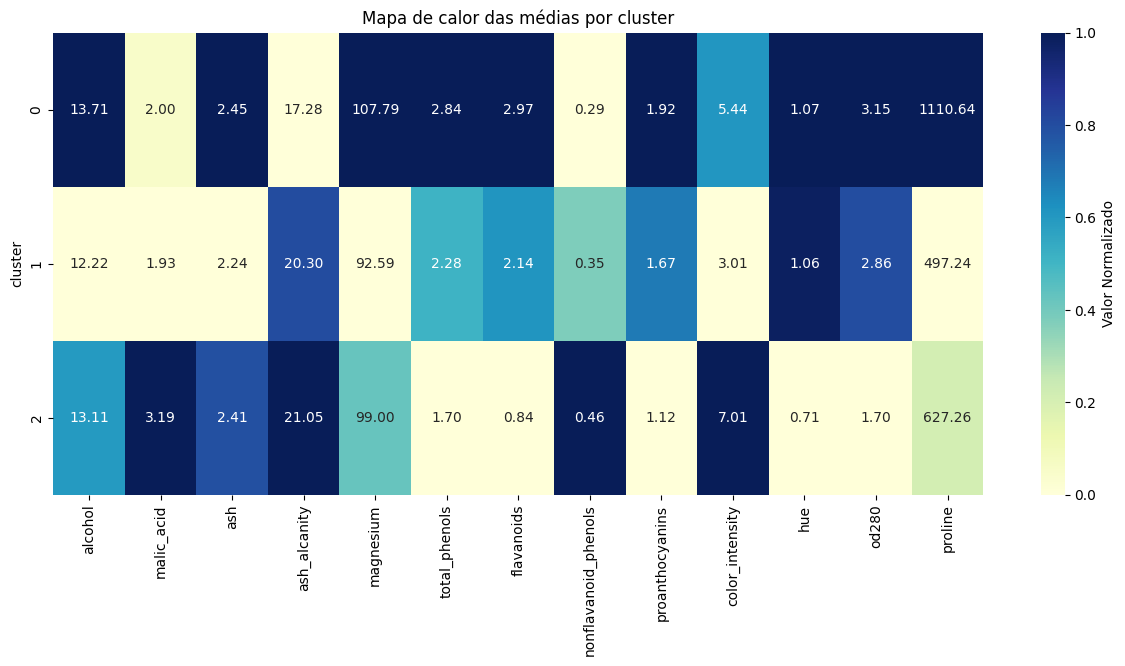

In [12]:
cluster_means = dados.groupby('cluster').mean()
normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

plt.figure(figsize=(15, 6))
sns.heatmap(normalized, annot=cluster_means, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Valor Normalizado'})
plt.title('Mapa de calor das médias por cluster')
plt.show()

## Agrupamento hierarquico

O agrupamento hierárquico é uma abordagem de análise de cluster que busca construir uma hierarquia de clusters. Ao contrário de métodos como o k-means, que partem de uma divisão direta dos dados em um número pré-definido de clusters, o agrupamento hierárquico permite uma visualização em múltiplos níveis.

### Processo:

* Início: Cada ponto de dados é tratado como um cluster individual. Ou seja, com N pontos, temos N clusters.
* Combinação: Em cada etapa subsequente, os dois clusters que estão mais próximos entre si são combinados em um único cluster, reduzindo o número total de clusters por um.
* Conclusão: Esse processo continua até que todos os pontos estejam contidos em um único cluster grande.

A "proximidade" entre dois clusters pode ser definida de várias maneiras:

* Ligação Simples: Distância entre os pontos mais próximos de dois clusters.
* Ligação Completa: Distância entre os pontos mais distantes de dois clusters.
* Ligação Média: Média das distâncias entre todos os pares de pontos pertencentes aos dois clusters.
* Ligação de Ward: Minimiza o aumento total da variância dentro do cluster ao mesclar dois clusters.

O resultado desse processo é comumente visualizado por meio de um dendrograma, uma representação gráfica em forma de árvore que mostra a ordem e as distâncias (ou similaridade) nas combinações de clusters.

Na prática, ao usar o dendrograma, os analistas muitas vezes "cortam" a árvore em uma certa altura para definir um número desejado de clusters, permitindo flexibilidade na escolha do número final de clusters baseado na estrutura dos dados e no conhecimento do domínio.

### Vantagens:

Fornece uma visualização rica em informações.
Não requer especificação do número de clusters antecipadamente.
### Desvantagens:

Pode ser computacionalmente intensivo para conjuntos de dados grandes.
A decisão sobre onde "cortar" o dendrograma pode ser subjetiva.

### Exemplo inicial




In [13]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

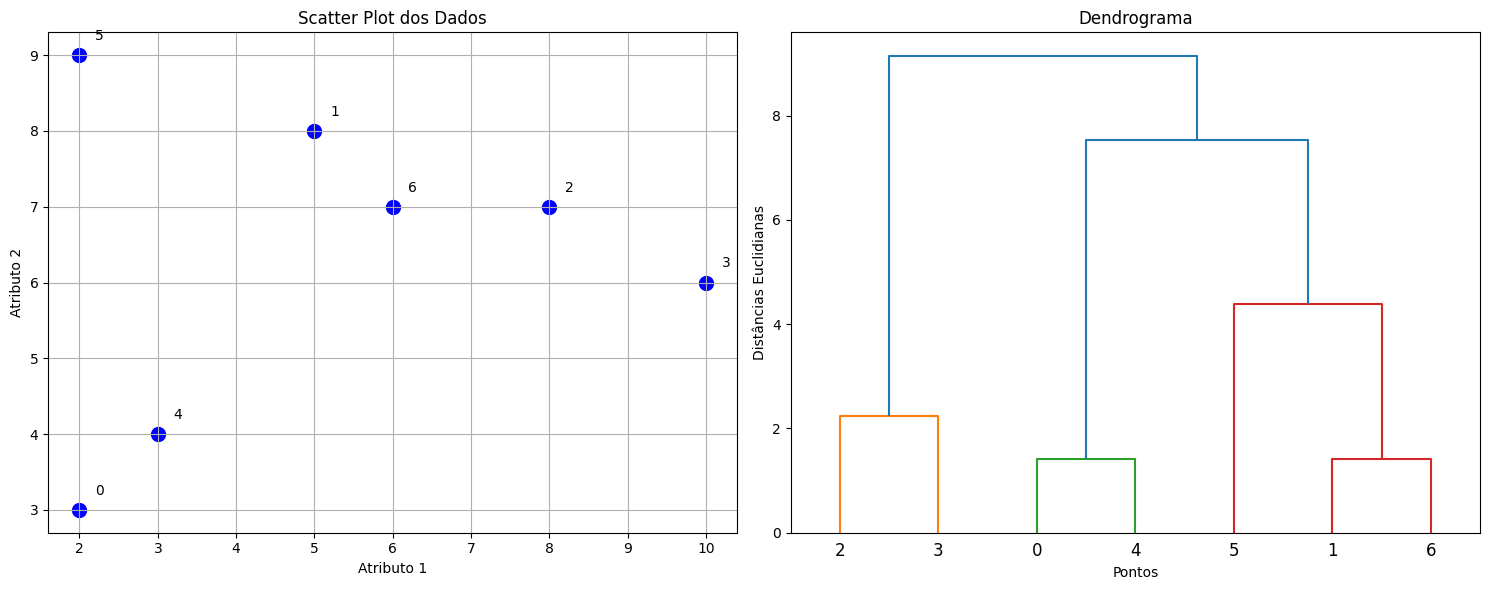

In [14]:
data = {
    'Atributo1': [2, 5, 8, 10, 3, 2, 6],
    'Atributo2': [3, 8, 7, 6, 4, 9, 7]
}
df = pd.DataFrame(data)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].scatter(df['Atributo1'], df['Atributo2'], s=100, c='blue', marker='o', label='Pontos')
axes[0].set_xlabel('Atributo 1')
axes[0].set_ylabel('Atributo 2')
axes[0].grid(True)
axes[0].set_title('Scatter Plot dos Dados')
for i, txt in enumerate(df.index):
    axes[0].annotate(txt, (df['Atributo1'][i]+0.2, df['Atributo2'][i]+0.2), fontsize=10, color='black')

dendrogram = sch.dendrogram(sch.linkage(df.values, method='ward'), ax=axes[1])
axes[1].set_title('Dendrograma')
axes[1].set_xlabel('Pontos')
axes[1].set_ylabel('Distâncias Euclidianas')
plt.tight_layout()


Sob diferentes métodos

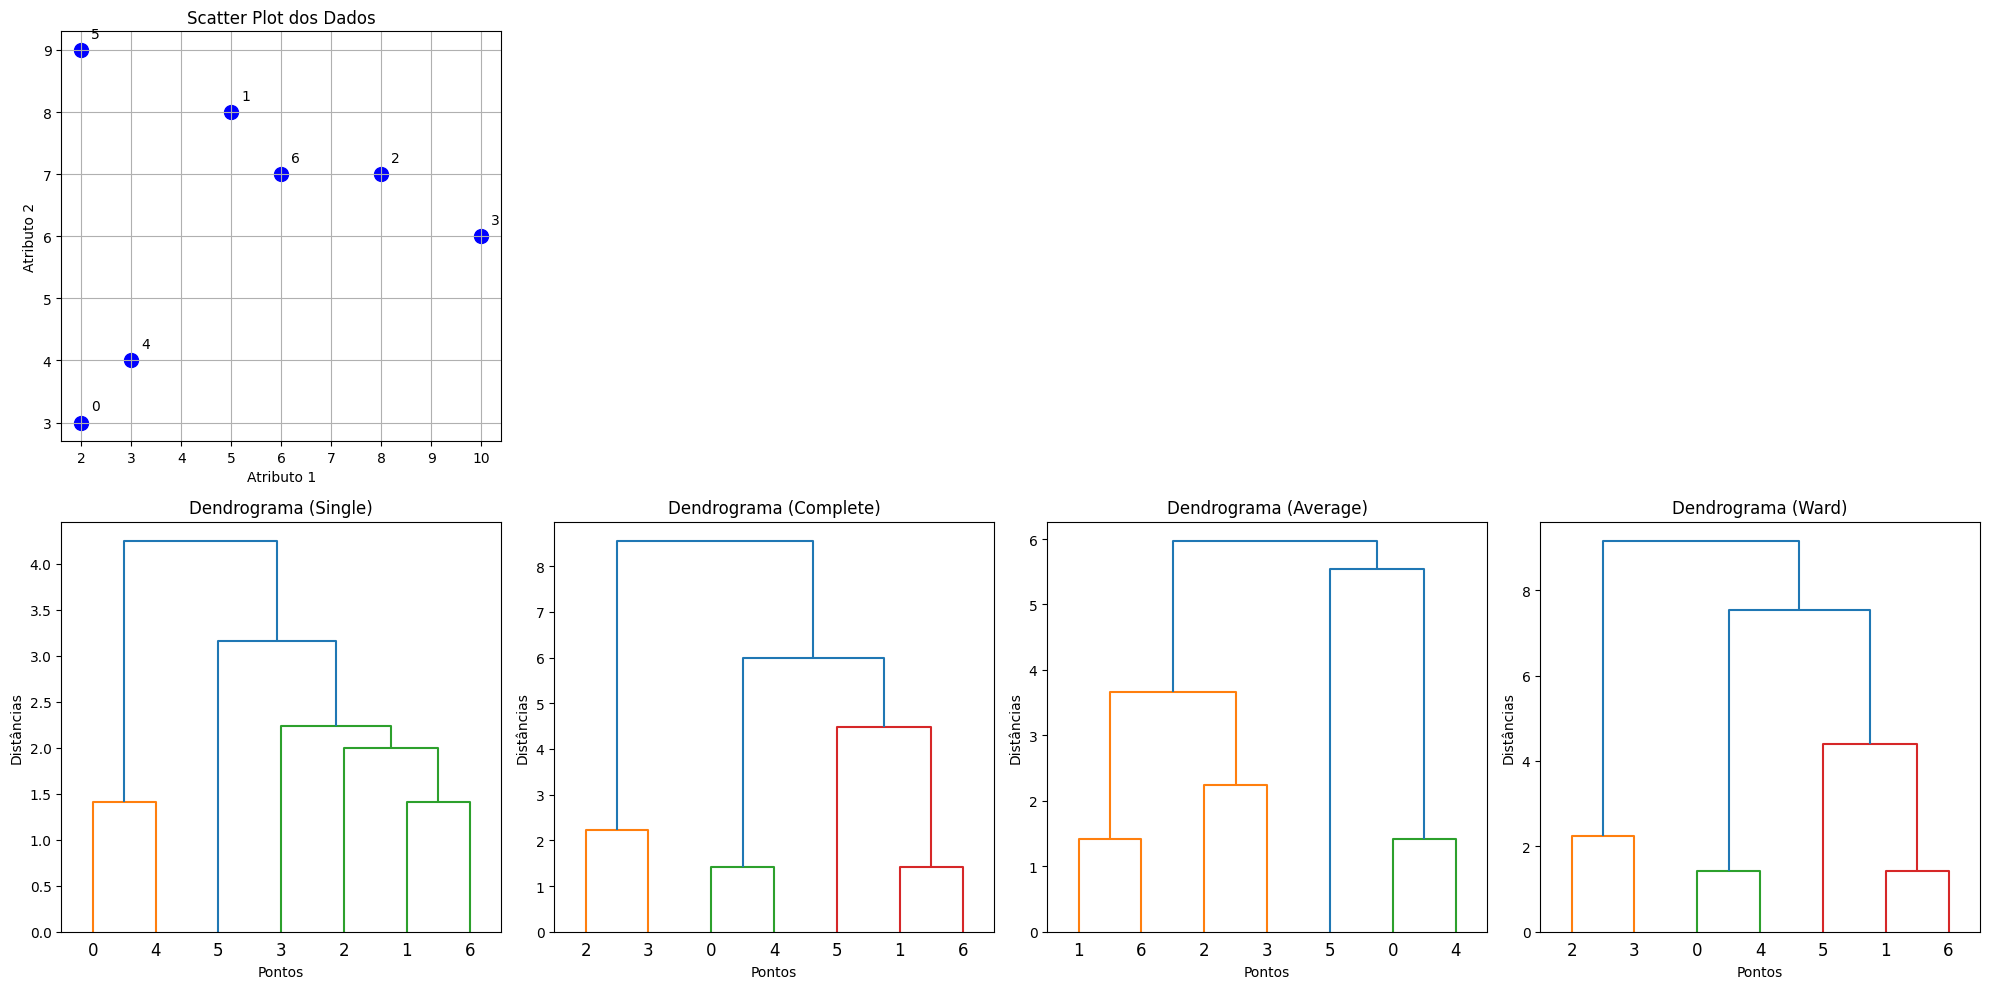

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes[0, 0].scatter(df['Atributo1'], df['Atributo2'], s=100, c='blue', marker='o')
axes[0, 0].set_xlabel('Atributo 1')
axes[0, 0].set_ylabel('Atributo 2')
axes[0, 0].grid(True)
axes[0, 0].set_title('Scatter Plot dos Dados')
for i, txt in enumerate(df.index):
    axes[0, 0].annotate(txt, (df['Atributo1'][i]+0.2, df['Atributo2'][i]+0.2), fontsize=10, color='black')
for ax in axes[0, 1:]:
    ax.axis('off')
methods = ['single', 'complete', 'average', 'ward']

for i, method in enumerate(methods):
    sch.dendrogram(sch.linkage(df.values, method=method), ax=axes[1, i])
    axes[1, i].set_title(f'Dendrograma ({method.capitalize()})')
    axes[1, i].set_xlabel('Pontos')
    axes[1, i].set_ylabel('Distâncias')

plt.tight_layout()

### Utilizando nossos dados do vinho

Text(0, 0.5, 'Distâncias')

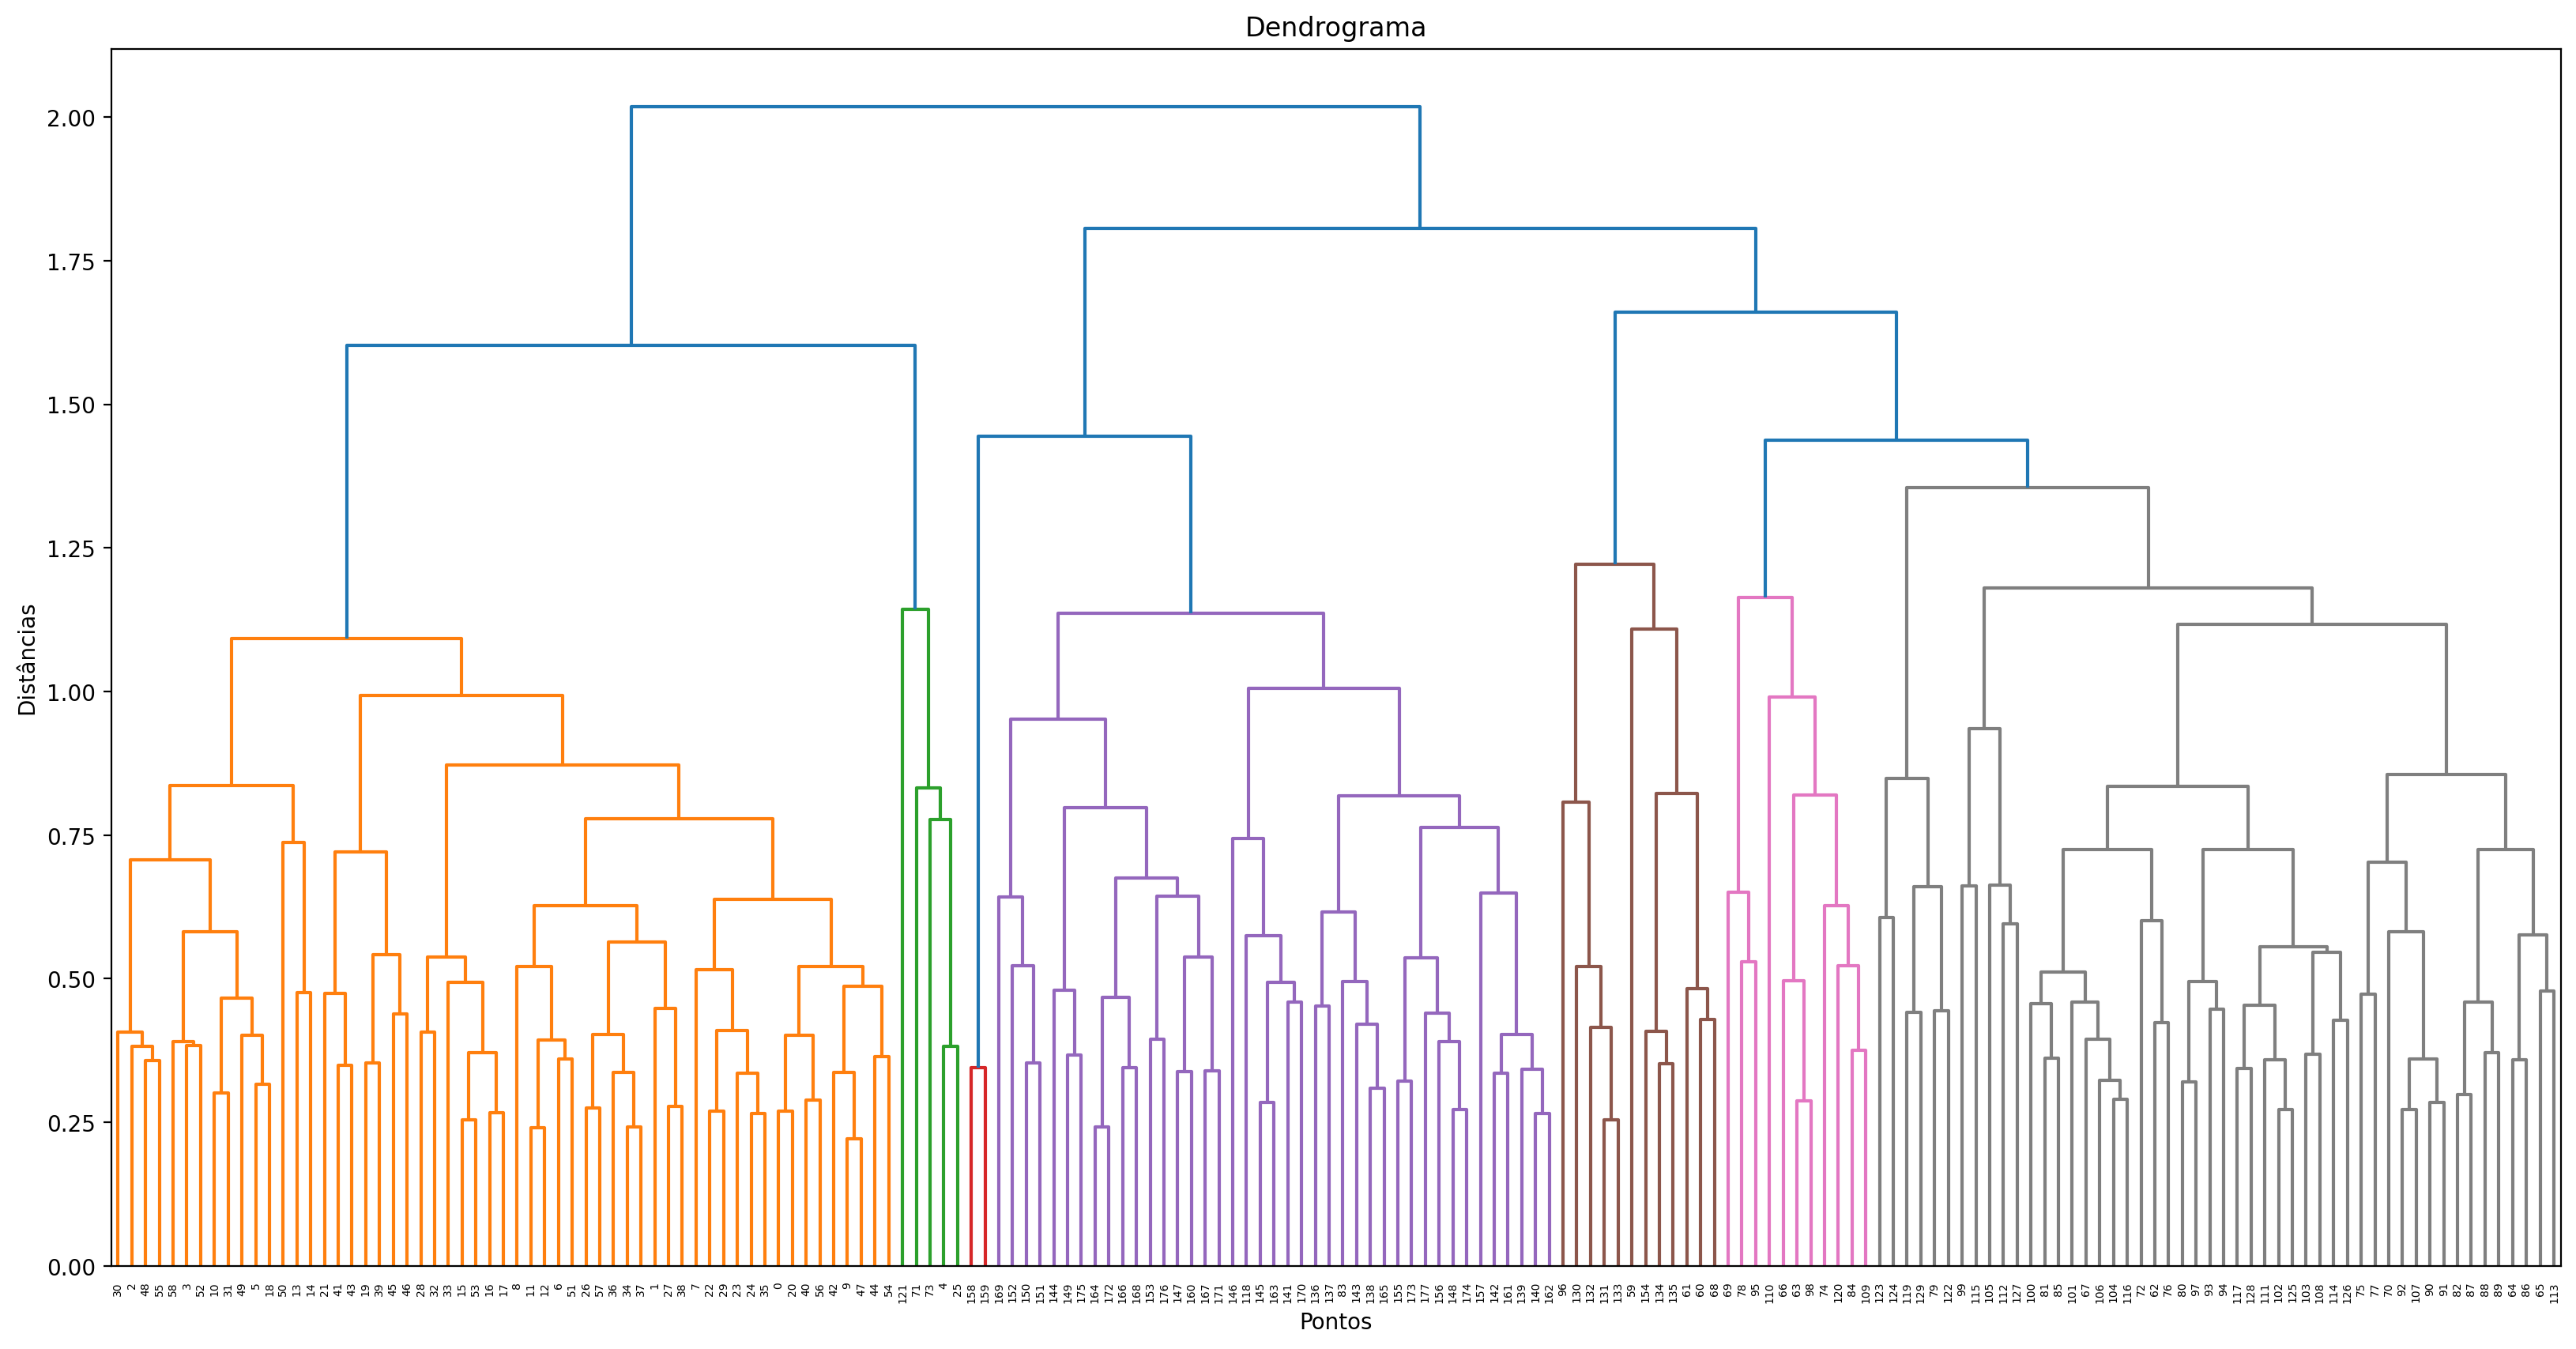

In [16]:
fig, axes = plt.subplots(figsize=(20,10),dpi = 200)
dendrogram = sch.dendrogram(sch.linkage(x, method='complete'), ax=axes)
axes.set_title(f'Dendrograma')
axes.set_xlabel('Pontos')
axes.set_ylabel('Distâncias')
# médotos possíveis: ['single','complete','average','weighted','centroid','ward']

## DBScan

O DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de clustering baseado em densidade, que pode identificar clusters de formas variadas em um conjunto de dados, diferentemente dos algoritmos baseados em centróides, como o K-means.

Aqui estão alguns pontos-chave sobre o DBSCAN:

1. Densidade: O DBSCAN funciona identificando áreas do espaço de entrada com alta densidade de pontos de dados, em contraste com áreas de baixa densidade. Essas áreas densas são consideradas clusters.

2. Pontos centrais, de borda e outliers: Com base em dois parâmetros principais (eps e min_samples), o DBSCAN classifica os pontos em três tipos:

   * Ponto central: Um ponto que tem pelo menos um número mínimo de pontos (min_samples) dentro de uma determinada distância (eps) é considerado um ponto central.
   * Ponto de borda: Um ponto que está dentro da distância eps de um ponto central, mas não tem min_samples pontos ao seu redor, é considerado um ponto de borda.
   * Outlier: Um ponto que não é nem um ponto central nem um ponto de borda é considerado um outlier ou ruído.

3. Não exige especificação do número de clusters: Ao contrário do K-means, você não precisa especificar o número de clusters com antecedência. O DBSCAN determinará os clusters com base na densidade.

4. Lida com outliers: Uma das características mais distintas do DBSCAN é sua capacidade de identificar e tratar outliers, classificando-os como ruído.

5. Clusters de formas variadas: Ao contrário do K-means, que tende a encontrar clusters esféricos, o DBSCAN pode identificar clusters de várias formas.

6. Parâmetros: A escolha adequada de eps e min_samples é crucial para a performance do DBSCAN. Uma escolha inadequada pode resultar em clusters mal formados ou na ausência de clusters.

Em resumo, o DBSCAN é um algoritmo de clustering versátil que pode identificar clusters baseados em densidade e é especialmente útil quando os clusters são de formas irregulares e quando a presença de outliers é significativa.







In [18]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.4, min_samples=5)
clusters = dbscan.fit_predict(x)
dados['cluster_db'] = clusters
dados.cluster_db.value_counts()


cluster_db
-1    78
 0    69
 3    14
 1     9
 2     8
Name: count, dtype: int64

In [19]:
eps = np.linspace(.2,0.6,100)
min_samples = list(range(2,20))
infos = pd.DataFrame(columns=['eps','min_samples','clusters','sem_cluster'])
for i in eps:
    for j in min_samples:
        dbscan = DBSCAN(eps=i, min_samples=j)
        clusters = dbscan.fit_predict(x)
        dados['cluster_db'] = clusters
        clusters = dados.cluster_db.nunique()
        sem_cluster = dados[dados.cluster_db==-1]
        if sem_cluster.empty:
            sem_cluster = 0
        else:
            sem_cluster = sem_cluster.shape[0]
        infos.loc[infos.shape[0]]=[i,j,clusters,sem_cluster]
infos['pc_sem_cluster'] = infos.sem_cluster/dados.shape[0]*100

<Axes: xlabel='min_samples', ylabel='eps'>

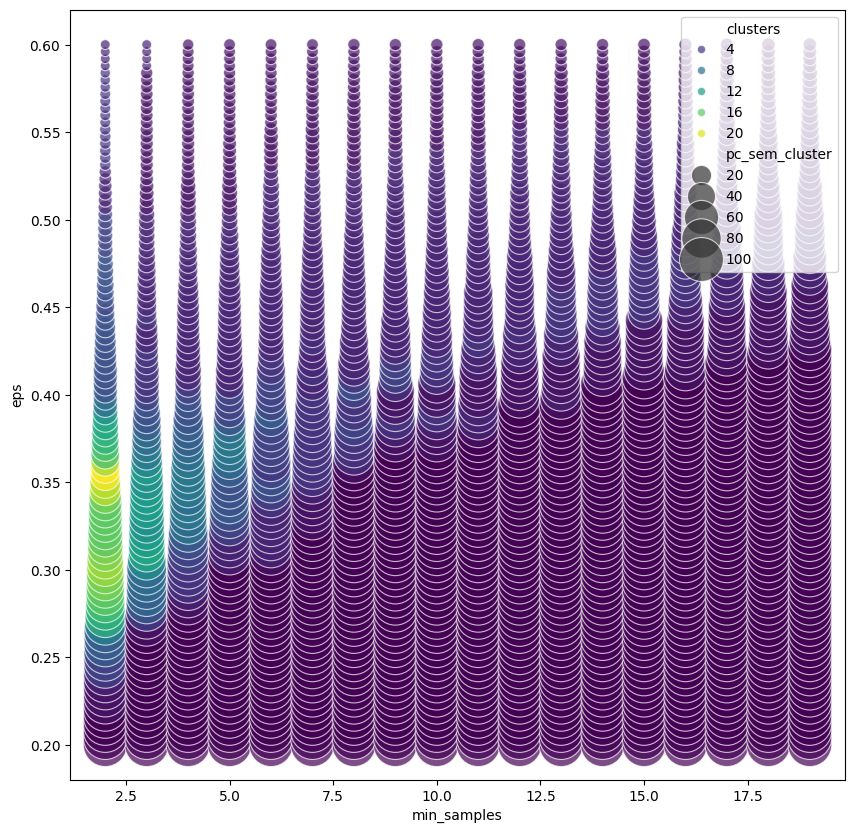

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=infos, x='min_samples', y='eps', size='pc_sem_cluster', hue='clusters', palette='viridis', sizes=(50,1000), alpha=0.7)

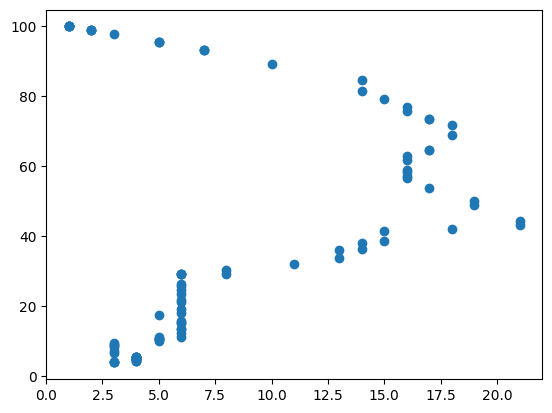

In [21]:
min_samples_cut = infos[infos.min_samples == 2]
plt.scatter(x = min_samples_cut.clusters, y = min_samples_cut.pc_sem_cluster)


In [22]:
cluster6 = infos[(infos.clusters==5)&(infos.min_samples == 2)]
cluster6

,eps,min_samples,clusters,sem_cluster,pc_sem_cluster
198,0.244444,2.0,5.0,170.0,95.505618
216,0.248485,2.0,5.0,170.0,95.505618
234,0.252525,2.0,5.0,170.0,95.505618
1116,0.450505,2.0,5.0,31.0,17.415730
1260,0.482828,2.0,5.0,20.0,11.235955
1278,0.486869,2.0,5.0,19.0,10.674157
1296,0.490909,2.0,5.0,19.0,10.674157
1314,0.494949,2.0,5.0,19.0,10.674157
1332,0.498990,2.0,5.0,19.0,10.674157
1350,0.503030,2.0,5.0,18.0,10.112360


In [23]:
dbscan = DBSCAN(eps=0.503030, min_samples=2)
clusters = dbscan.fit_predict(x)
dados['cluster_db'] = clusters
dados.cluster_db.value_counts()

cluster_db
 0    105
 1     51
-1     18
 2      2
 3      2
Name: count, dtype: int64

<Axes: xlabel='alcohol', ylabel='malic_acid'>

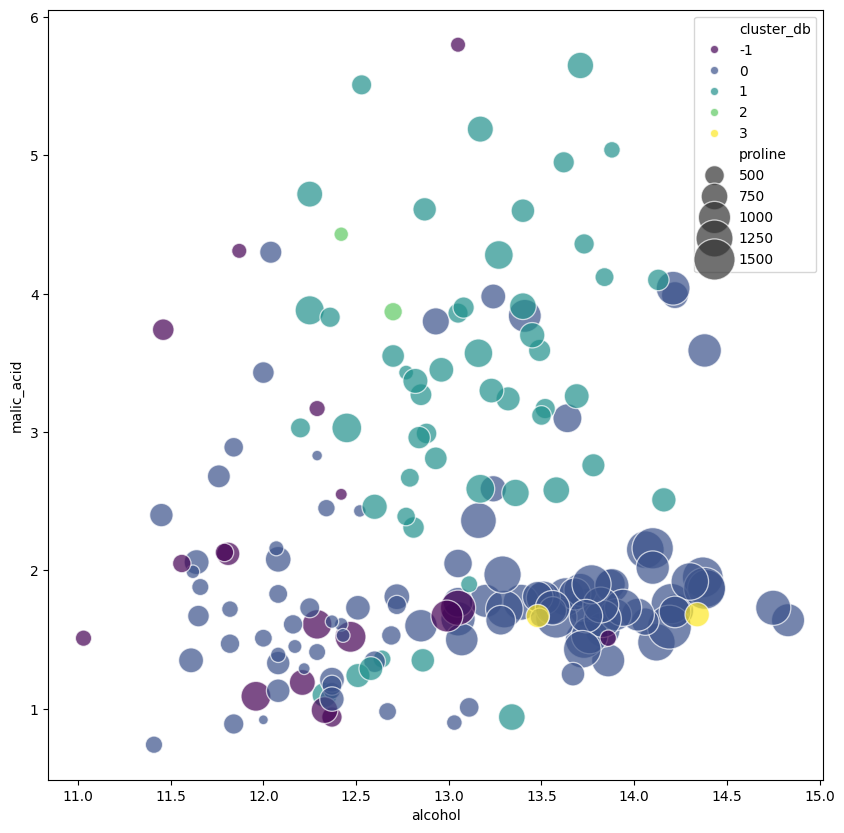

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dados, x='alcohol', y='malic_acid', size='proline', hue='cluster_db', palette='viridis', sizes=(50,1000), alpha=0.7)

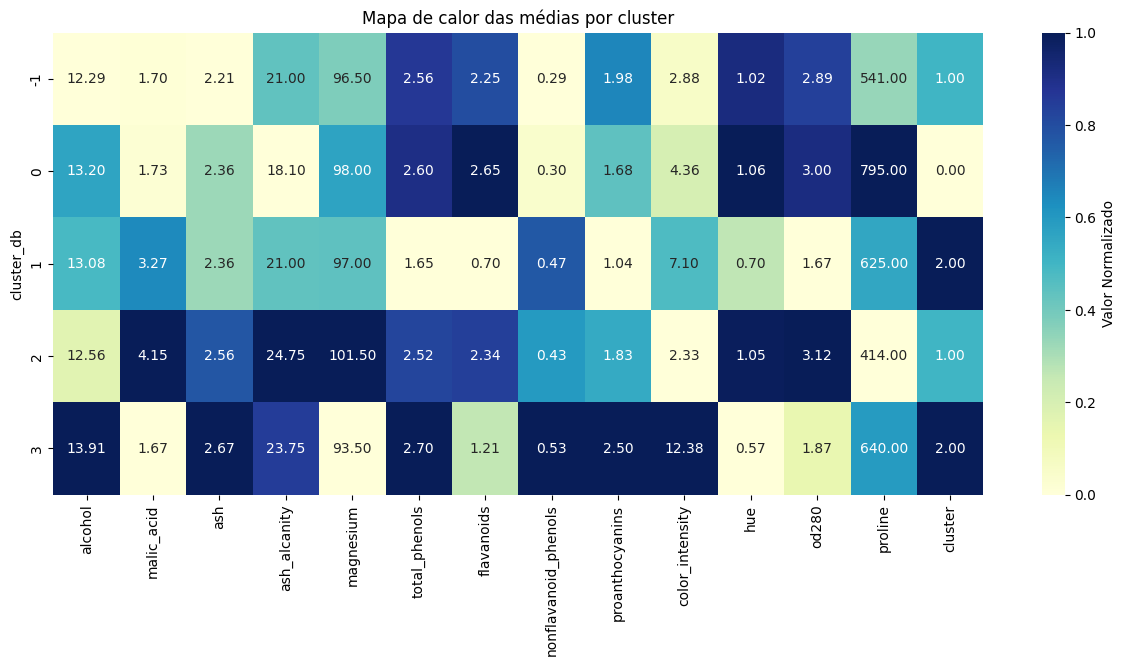

In [25]:
cluster_means = dados.groupby('cluster_db').median()
normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())
plt.figure(figsize=(15, 6))
sns.heatmap(normalized, annot=cluster_means, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Valor Normalizado'})
plt.title('Mapa de calor das médias por cluster')
plt.show()

## Modelos de Mistura Gaussianos

(Gaussian Mixture Models, ou GMM) são uma técnica probabilística de modelagem para a identificação de clusters em um conjunto de dados.

Quando utilizamos GMM para clusterização, estamos essencialmente tentando ajustar uma mistura de distribuições Gaussianas aos dados. Cada Gaussiana identifica um cluster. Uma vez ajustados os parâmetros, podemos determinar o cluster mais provável para um determinado ponto ao verificar qual Gaussiana dá a maior densidade de probabilidade para esse ponto.

## Vantagens do GMM:

* Flexibilidade de Formas de Cluster: Diferentemente do k-means que assume que os clusters são esféricos e igualmente dimensionados, o GMM pode modelar clusters elípticos de diferentes tamanhos.
* Estimação Probabilística: O GMM fornece uma abordagem probabilística para a clusterização, o que pode ser útil em muitas aplicações.

## Desvantagens:

* Complexidade Computacional: Devido ao uso do algoritmo EM e à necessidade de calcular determinantes e inversos de matrizes de covariância, o GMM pode ser mais lento e exigir mais memória do que técnicas de clusterização mais simples, como o k-means.
* Inicialização Sensível: A solução final do GMM pode ser sensível à inicialização dos parâmetros.

Em resumo, o GMM é uma poderosa técnica de clusterização que assume que os dados são gerados a partir de uma mistura de várias distribuições Gaussianas. Seu poder e flexibilidade vêm ao custo de maior complexidade computacional em comparação com métodos mais simples.


In [26]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
clusters = gmm.fit_predict(x)
dados['cluster_gmm'] = clusters

In [27]:
dados.cluster_gmm.value_counts()

cluster_gmm
2    61
0    57
3    32
1    28
Name: count, dtype: int64

<Axes: xlabel='alcohol', ylabel='malic_acid'>

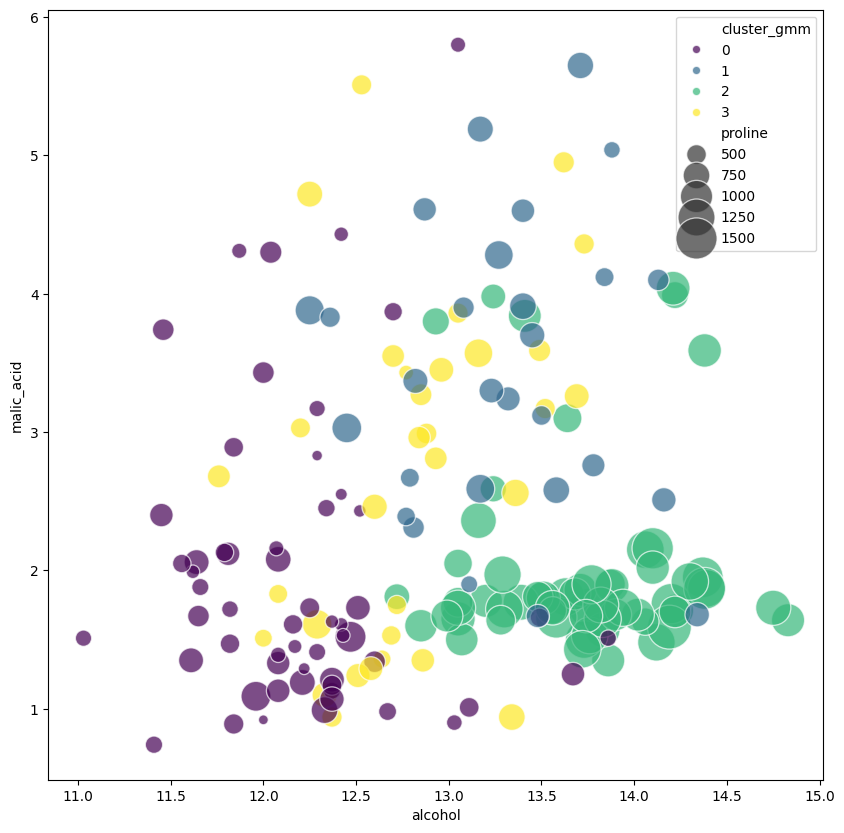

In [28]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dados, x='alcohol', y='malic_acid', size='proline', hue='cluster_gmm', palette='viridis', sizes=(50,1000), alpha=0.7)

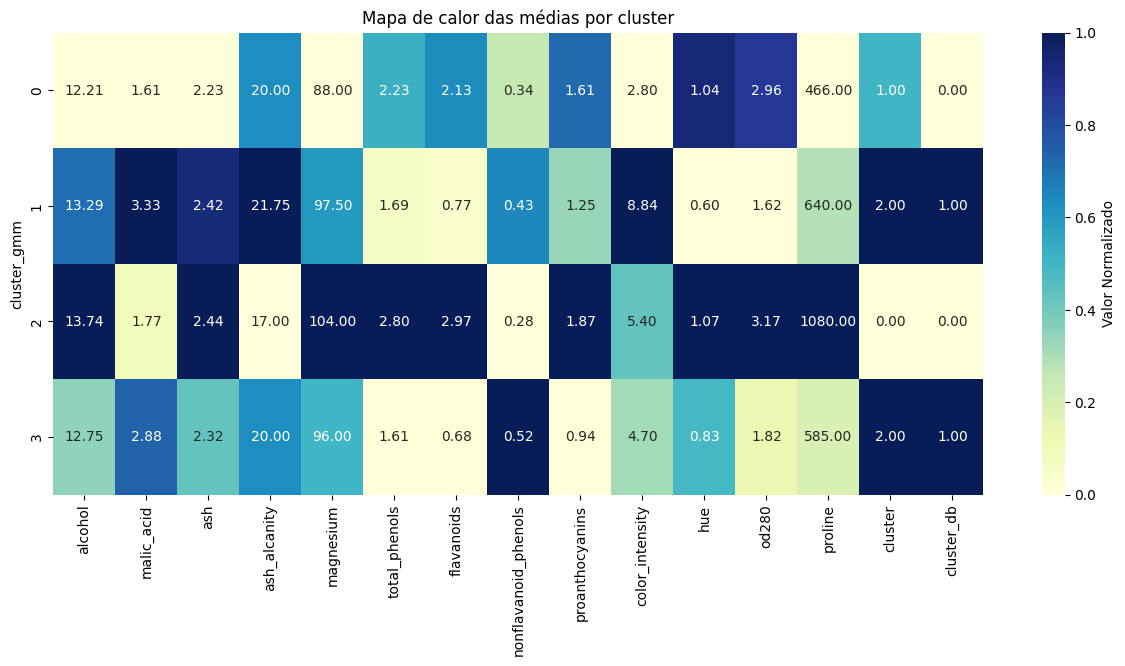

In [29]:
cluster_means = dados.groupby('cluster_gmm').median()
normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())
plt.figure(figsize=(15, 6))
sns.heatmap(normalized, annot=cluster_means, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Valor Normalizado'})
plt.title('Mapa de calor das médias por cluster')
plt.show()